LGBM Classifier

In [88]:
######################################################################수정
# import os
# import utils
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# from sklearn.metrics import davies_bouldin_score
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from cluster import make_data

# def KmeanClustering(data, k):
#     np_external = external.to_numpy()
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(np_external)
#     labels = kmeans.labels_
    
#     fig = plt.figure(figsize=(7,7))
#     fig.set_facecolor('white')
#     for i, label in enumerate(labels):
#         if label == 0:
#             color = 'navy'
#         elif label == 1:
#             color = 'tomato'
#         elif label == 2:
#             color = 'green'
#         elif label == 3:
#             color = 'orange'
#         plt.scatter(np_external[i,0],np_external[i,1], color=color)

#     plt.xlabel('tps')
#     plt.ylabel('latency')
#     plt.show()
#     return labels

# def get_data(knob_path, external_path, i, num, wk):
#     for i in range(10):
#         KNOB_PATH = (f'../data/configs_new_dataset/{i}')
#         # raw_knobs_list=[]    
#         for num in range(2000):
#             #raw_knobs_path = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#             raw_knobs = make_data(os.path.join(KNOB_PATH, f'my_{num}.cnf'))
#             raw_knobs = pd.DataFrame(raw_knobs)
#             # raw_knobs_list.append(raw_knobs)
#     # input_data = make_data('../data/configs_new_dataset/5/*.cnf')  
#         # raw_knobs = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#         # raw_knobs = pd.raw_knobs
#         # print(10)
#         # quit()
    
#     #raw_knobs = utils.mysql_knob_dataframe(wk, KNOB_PATH)
#     #데이터프레임으로 config 불러옴
    
#     #EXTERNAL_PATH = os.path.join('..','data', 'configs_new_dataset', 'external_new_dataset')
#     EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")
#     for i in range(10):
#         external_ = pd.read_csv(os.path.join(EXTERNAL_PATH, f'external_results_{i}.csv'), index_col=0)
#     latency_columns = []
#     for col in external_.columns:
#         if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
#             latency_columns.append(col)
#     external = external_[['tps']].copy()
#     external['latency'] = external_[latency_columns].max(axis=1)
#     return raw_knobs, external


In [1]:
#원본
import os
import utils
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from cluster import make_data
import configparser

def mysql_knob_dataframe(wk, knobs_path):
    knobs_path = os.path.join(knobs_path, str(wk))
    config_len = len(os.listdir(knobs_path))
    cnf_parser = configparser.ConfigParser()
    pd_mysql = pd.DataFrame()
    for idx in range(config_len):
        cnf_parser.read(os.path.join(knobs_path, f'my_{idx}.cnf'))
        conf_dict = cnf_parser._sections['mysqld']
        tmp = pd.DataFrame(data=[conf_dict.values()], columns=conf_dict.keys())
        pd_mysql = pd.concat([pd_mysql, tmp])
        
    pd_mysql = pd_mysql.reset_index(drop=True)
    pd_mysql = pd_mysql.drop(columns=['log-error', 'bind-address'])
    return pd_mysql

def KmeanClustering(data, k):
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    
    fig = plt.figure(figsize=(7,7))
    fig.set_facecolor('white')
    for i, label in enumerate(labels):
        if label == 0:
            color = 'navy'
        elif label == 1:
            color = 'tomato'
        elif label == 2:
            color = 'green'
        elif label == 3:
            color = 'orange'
        plt.scatter(np_external[i,0],np_external[i,1], color=color)

    plt.xlabel('tps')
    plt.ylabel('latency')
    plt.show()
    return labels

def get_data(knob_path, external_path, wk):
    raw_knobs = mysql_knob_dataframe(wk, knob_path)
    
    
    external_ = pd.read_csv(os.path.join(external_path, f'external_results_{wk}.csv'), index_col=0)
    latency_columns = []
    for col in external_.columns:
        if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
            latency_columns.append(col)
    external = external_[['tps']].copy()
    external['latency'] = external_[latency_columns].max(axis=1)
    return raw_knobs, external

def get_class_num(data):
    cls, cnt = np.unique(data, return_counts=True)
    print(f'# of the largest class / # of data = {max(cnt) / sum(cnt)}')
    for _ in range(len(cls)):
        print(f'{cls[_]} : {cnt[_]}')

In [ ]:
# #수정
# def get_data(knob_path, external_path, num, wk):

#     KNOB_PATH = (f'../data/configs_new_dataset/{wk}')
#     # raw_knobs_list=[]    

#     #raw_knobs_path = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#     raw_knobs = make_data(KNOB_PATH)
#     raw_knobs = pd.DataFrame(raw_knobs)
#     print(type(raw_knobs))
#     # raw_knobs_list.append(raw_knobs)
#     # input_data = make_data('../data/configs_new_dataset/5/*.cnf')  
#         # raw_knobs = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#         # raw_knobs = pd.raw_knobs
#         # print(10)
#         # quit()
    
#     #raw_knobs = utils.mysql_knob_dataframe(wk, KNOB_PATH)
#     #데이터프레임으로 config 불러옴
    
#     #EXTERNAL_PATH = os.path.join('..','data', 'configs_new_dataset', 'external_new_dataset')
#     EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")
#     external_ = pd.read_csv(os.path.join(EXTERNAL_PATH, f'external_results_{wk}.csv'), index_col=0)
#     latency_columns = []
#     for col in external_.columns:
#         if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
#             latency_columns.append(col)
#     external = external_[['tps']].copy()
#     external['latency'] = external_[latency_columns].max(axis=1)
#     return raw_knobs, external

In [100]:
# def mysql_knob_dataframe(wk, knobs_path):
#     knobs_path = os.path.join(knobs_path, str(wk))
#     config_len = len(os.listdir(knobs_path))
#     cnf_parser = configparser.ConfigParser()
#     pd_mysql = pd.DataFrame()
#     for idx in range(config_len):
#         cnf_parser.read(os.path.join(knobs_path, f'my_{idx}.cnf'))
#         conf_dict = cnf_parser._sections['mysqld']
#         tmp = pd.DataFrame(data=[conf_dict.values()], columns=conf_dict.keys())
#         pd_mysql = pd.concat([pd_mysql, tmp])
        
#     pd_mysql = pd_mysql.reset_index(drop=True)
#     pd_mysql = pd_mysql.drop(columns=['log-error', 'bind-address'])
#     return pd_mysql

In [6]:
# KNOB_PATH = (f'../data/configs_new_dataset')


# # raw_knobs_list=[]    
# wk = 1
# #raw_knobs_path = os.path.join(KNOB_PATH, f'my_{num}.cnf')
# raw_knobs = mysql_knob_dataframe(wk, KNOB_PATH)
# raw_knobs

,table_open_cache,innodb_buffer_pool_size,innodb_buffer_pool_instances,innodb_purge_threads,innodb_read_io_threads,innodb_write_io_threads,innodb_adaptive_hash_index,innodb_flush_neighbors,innodb_io_capacity,innodb_lru_scan_depth,innodb_random_read_ahead,innodb_read_ahead_threshold,innodb_spin_wait_delay,innodb_sync_array_size,innodb_sync_spin_loops,innodb_thread_concurrency,metadata_locks_hash_instances,table_open_cache_instances,thread_cache_size,tmp_table_size
0,7961,4110465923,27,21,38,11,0,1,1564122,6794,1,1,34,383,90,12,187,27,103,814312919
1,6852,7513665853,40,10,55,40,0,0,226153,9331,0,44,48,339,67,40,613,57,799,37154826
2,4275,1102142987,11,11,15,21,1,1,1372132,362,0,53,25,617,14,38,386,35,749,948220072
3,4132,7309104409,8,22,3,42,0,0,602222,7636,0,23,9,3,7,25,857,51,492,77182985
4,2317,487864148,35,21,29,40,1,1,130963,1901,0,63,25,306,64,73,443,23,289,289694632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6223,1262480733,8,14,2,1,1,1,1980558,3244,0,58,3,454,95,20,662,50,452,258236048
1996,138,211966523,49,29,43,27,0,0,242452,7135,0,12,24,460,98,63,505,20,795,656527327
1997,3931,8421356727,37,17,53,11,1,1,851896,6110,0,50,30,279,93,61,555,44,610,729298449
1998,6680,7026434922,7,15,11,61,0,1,1059044,2069,1,2,19,1018,37,34,775,38,138,825486649


In [ ]:
#############################################################
# for i in range(10):
#         KNOB_PATH = (f'../data/configs_new_dataset/{i}')
#         # print(KNOB_PATH)
#     # input_data = make_data('../data/configs_new_dataset/5/*.cnf')  
#         raw_knobs_list = []
#         for num in range(2000):
#             #raw_knobs = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#             raw_knobs = make_data(os.path.join(KNOB_PATH, f'my_{num}.cnf'))
#             # print(raw_knobs.type)
#             raw_knobs_ = pd.DataFrame(raw_knobs)
#             raw_knobs_list.append(raw_knobs)
#             # raw_knobs = pd.raw_knobs
#             print(raw_knobs_list)
#             # print(raw_knobs_.type)

In [68]:
#############################################################
# EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")
# for wk in range(10):
#     external_ = pd.read_csv(os.path.join(EXTERNAL_PATH, f'external_results_{wk}.csv'), index_col=0)
# latency_columns = []
# for col in external_.columns:
#     if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
#         latency_columns.append(col)
# external = external_[['tps']].copy()
# external['latency'] = external_[latency_columns].max(axis=1)
# print(external)   

              tps  latency
0     2103.142511     2071
1     2332.073324     1982
2     2401.571570     1826
3     2417.250149     1994
4     1975.451662     2692
...           ...      ...
1995  2408.629619     1842
1996  2479.992644     1991
1997  2077.754788     2615
1998  2475.077015     1982
1999  2473.372370     1841

[2000 rows x 2 columns]


In [1]:
!pwd

/home/sein/ksc_model/model


In [2]:
# KNOB_PATH = os.path.join('..','data', 'configs_new_dataset')
# EXTERNAL_PATH = os.path.join('..','data', 'configs_new_dataset', 'external_new_dataset')

K-means Clustering

===================0 workload===================


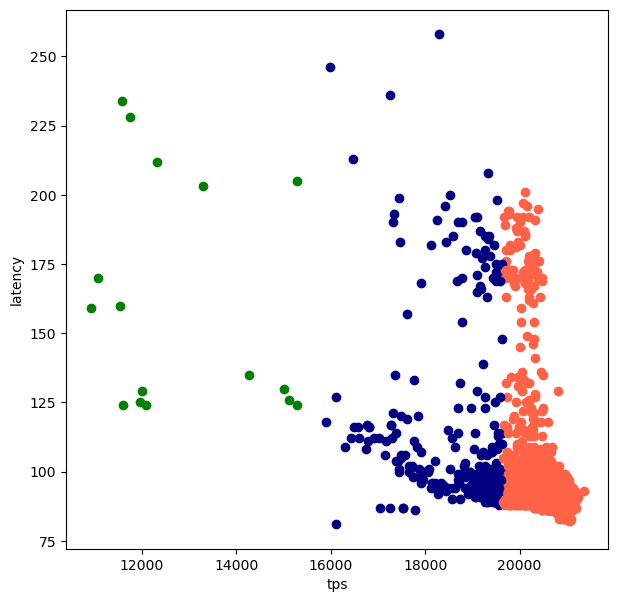

0 :  296
1 : 1688
2 :   16
===================1 workload===================


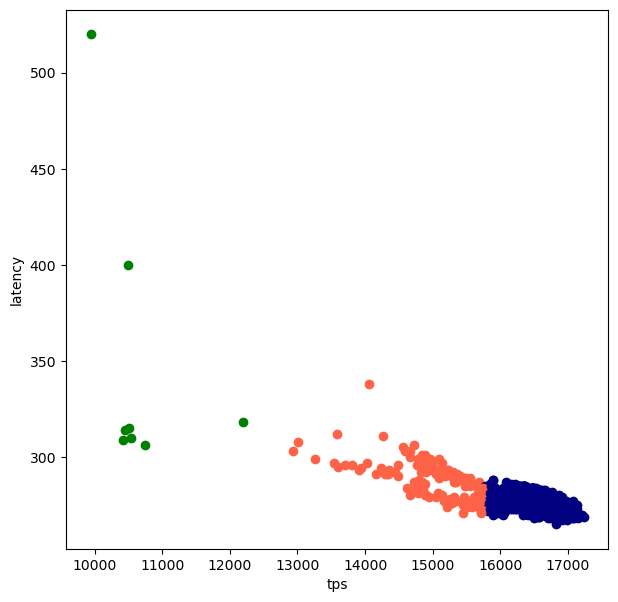

0 : 1850
1 :  142
2 :    8
===================2 workload===================


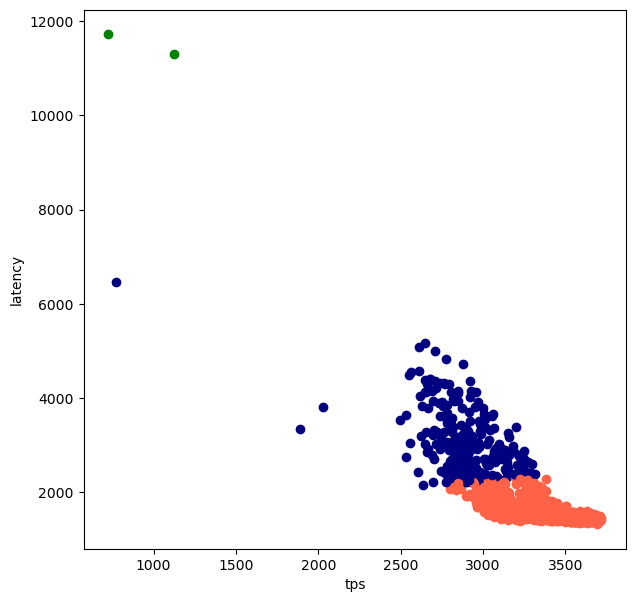

0 :  227
1 : 1771
2 :    2
===================3 workload===================


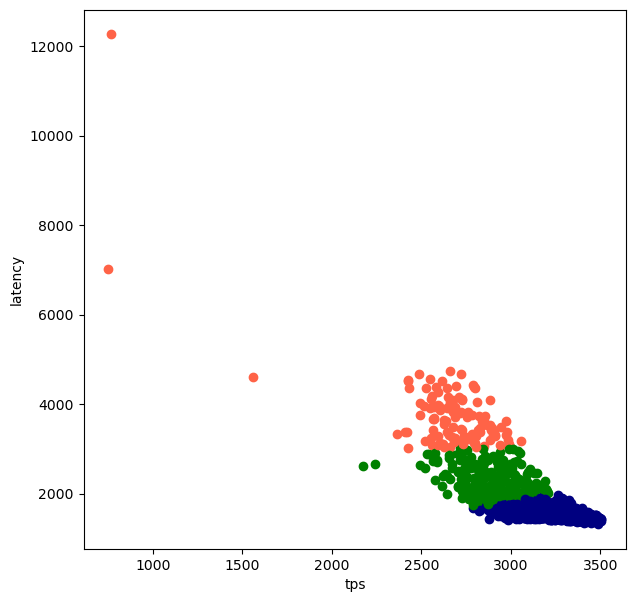

0 : 1634
1 :  115
2 :  251
===================4 workload===================


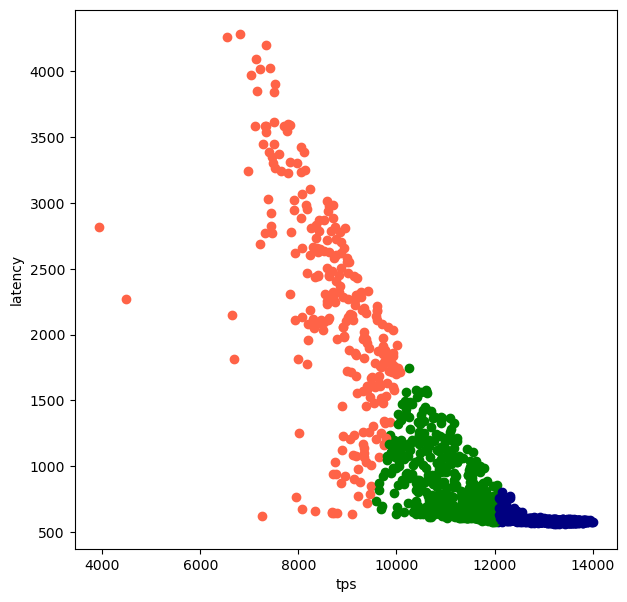

0 : 1198
1 :  266
2 :  536
===================5 workload===================


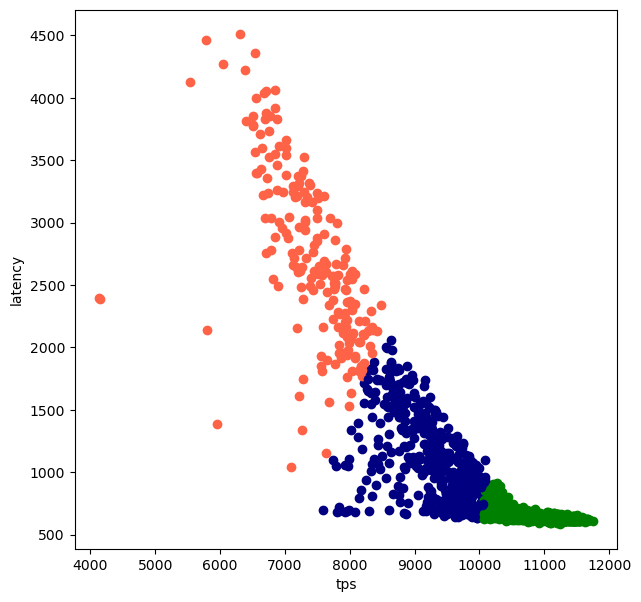

0 :  447
1 :  201
2 : 1352
===================6 workload===================


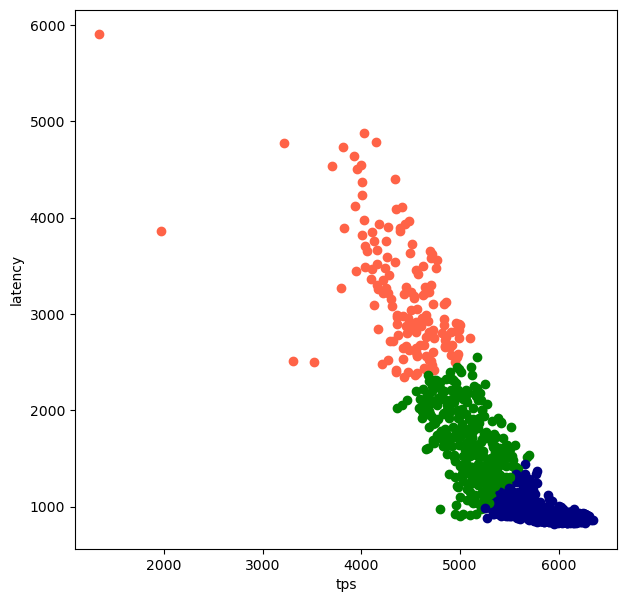

0 : 1503
1 :  151
2 :  346
===================7 workload===================


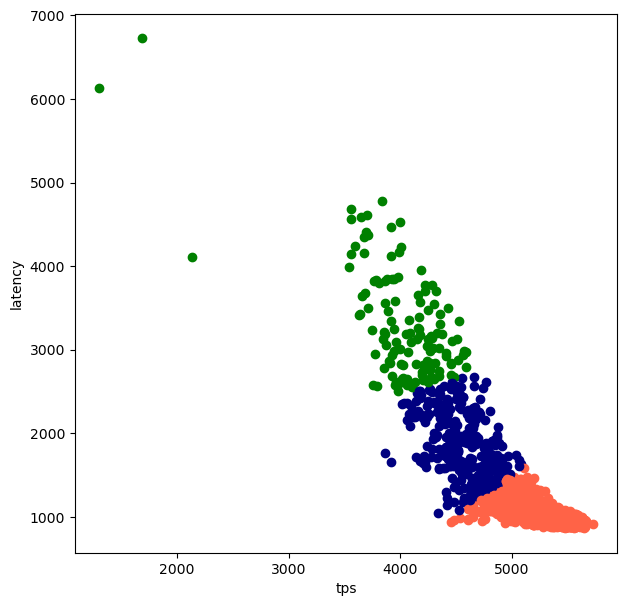

0 :  316
1 : 1554
2 :  130
===================8 workload===================


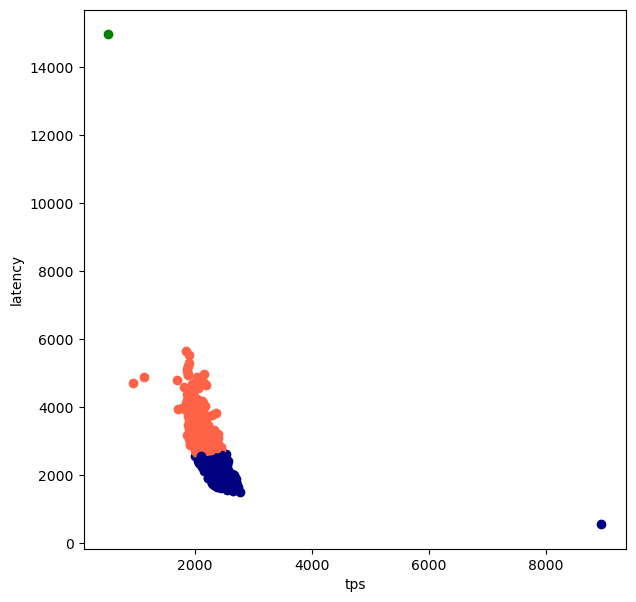

0 : 1792
1 :  207
2 :    1
===================9 workload===================


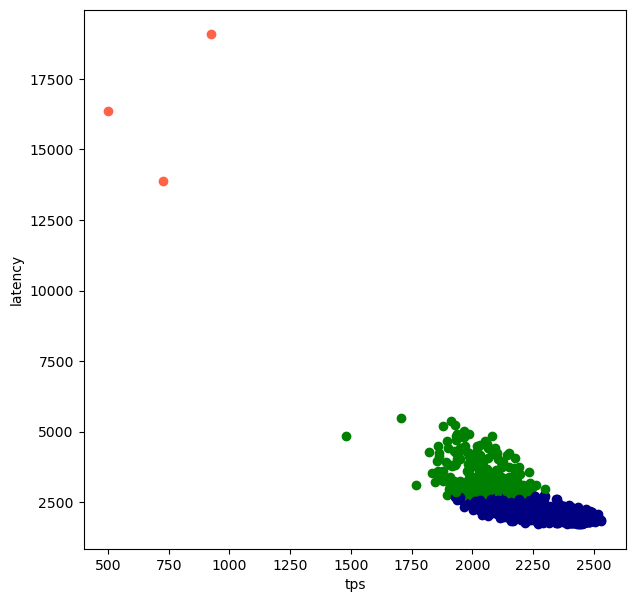

0 : 1787
1 :    3
2 :  210


In [2]:
# import get_data
# import KmeanClustering
KNOB_PATH = ('../data/configs_new_dataset')
EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")

for wk in range(10):
    print(f'==================={wk} workload===================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    labels = KmeanClustering(external, 3)
    cls, cnt = np.unique(labels, return_counts=True)
    print(f'{cls[0]} : {cnt[0]:4}\n{cls[1]} : {cnt[1]:4}\n{cls[2]} : {cnt[2]:4}')
    #print(f'score = {davies_bouldin_score(raw_knobs, labels)}')
    print(f'==================================================')

===================0 workload===================


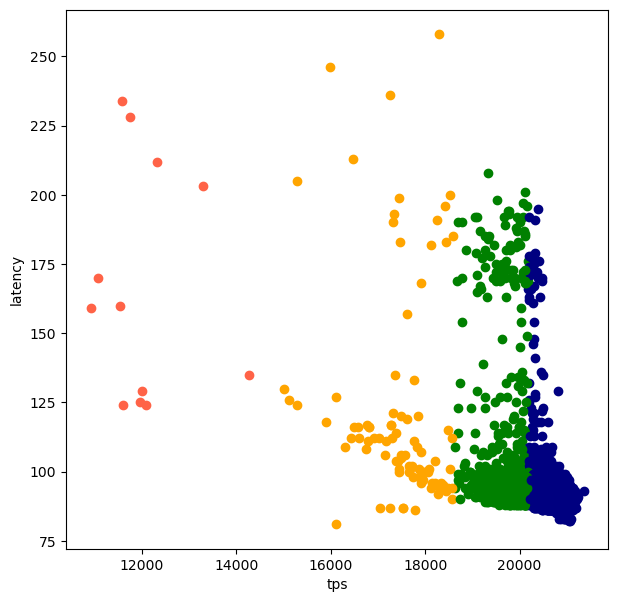

0 : 1288
1 :   12
2 :  607
3 :   93
===================1 workload===================


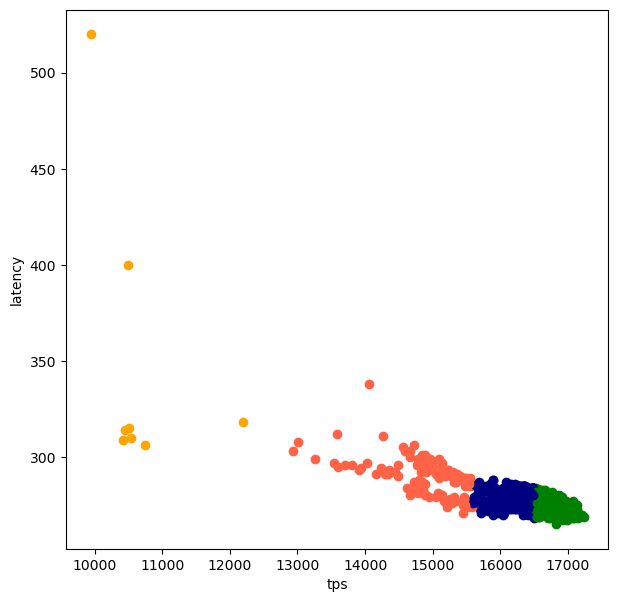

0 :  821
1 :  122
2 : 1049
3 :    8
===================2 workload===================


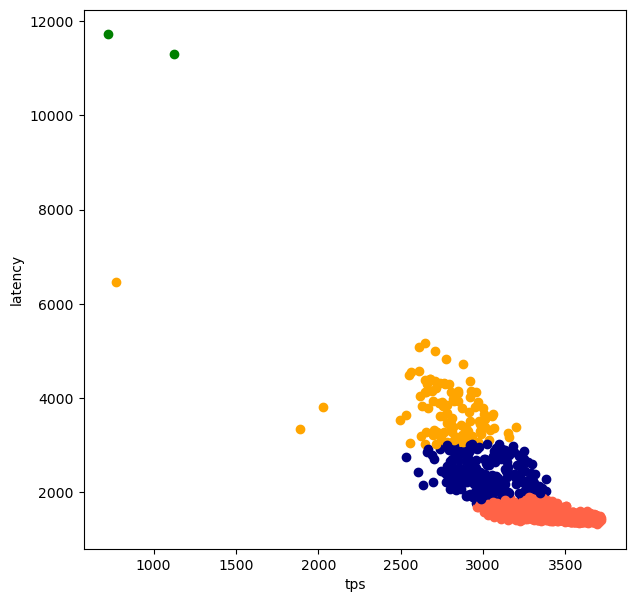

0 :  222
1 : 1672
2 :    2
3 :  104
===================3 workload===================


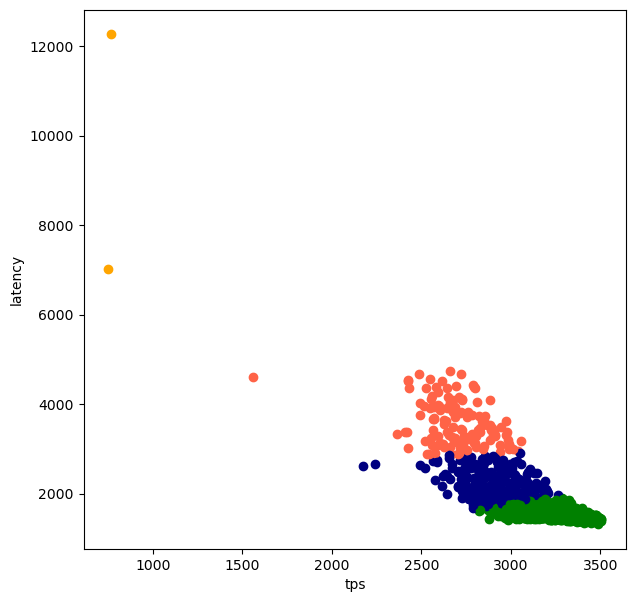

0 :  256
1 :  127
2 : 1615
3 :    2
===================4 workload===================


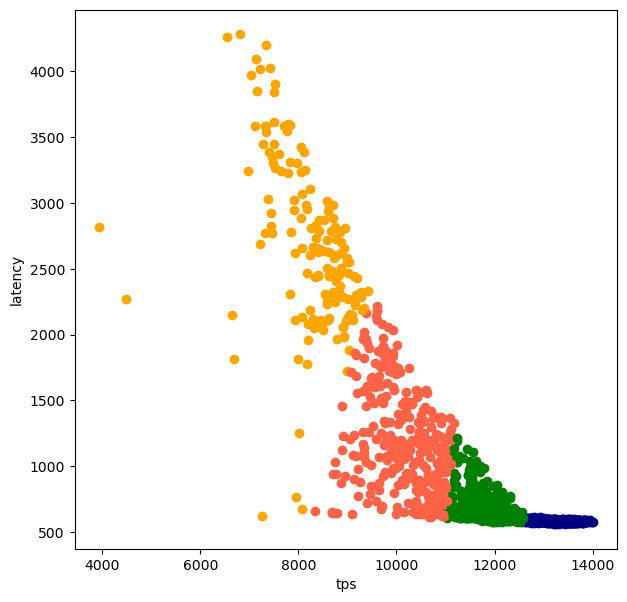

0 :  820
1 :  323
2 :  703
3 :  154
===================5 workload===================


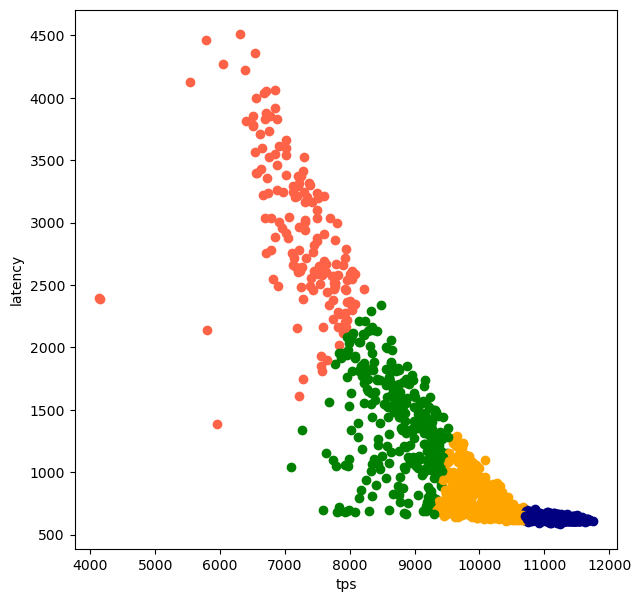

0 :  942
1 :  157
2 :  298
3 :  603
===================6 workload===================


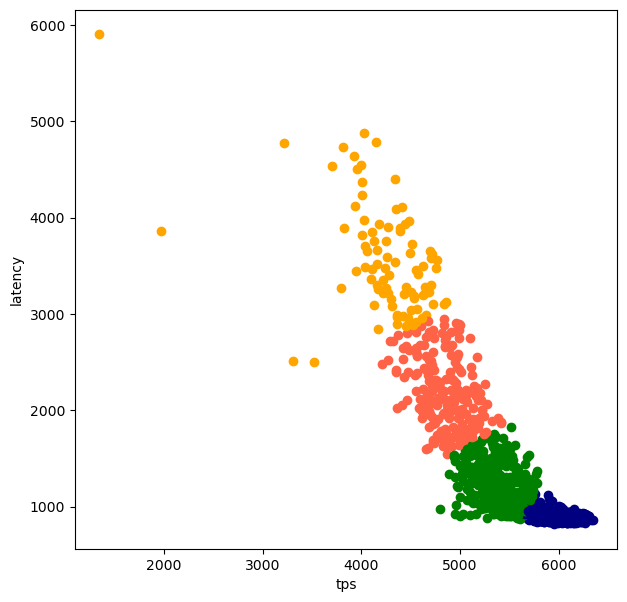

0 : 1246
1 :  219
2 :  446
3 :   89
===================7 workload===================


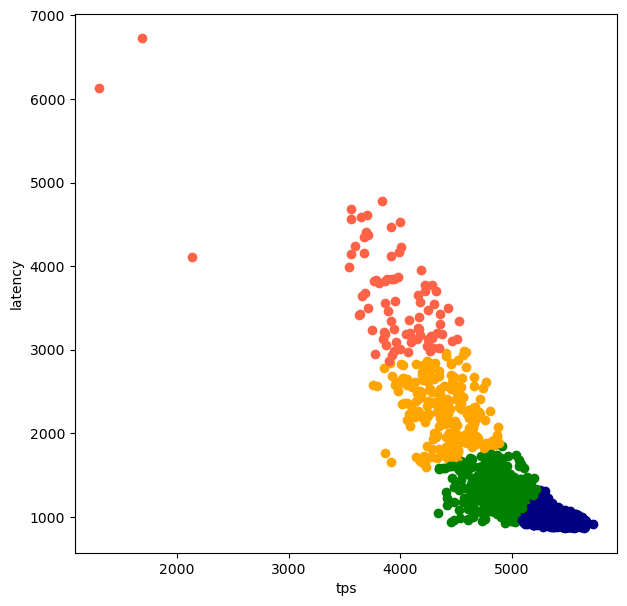

0 : 1242
1 :   84
2 :  445
3 :  229
===================8 workload===================


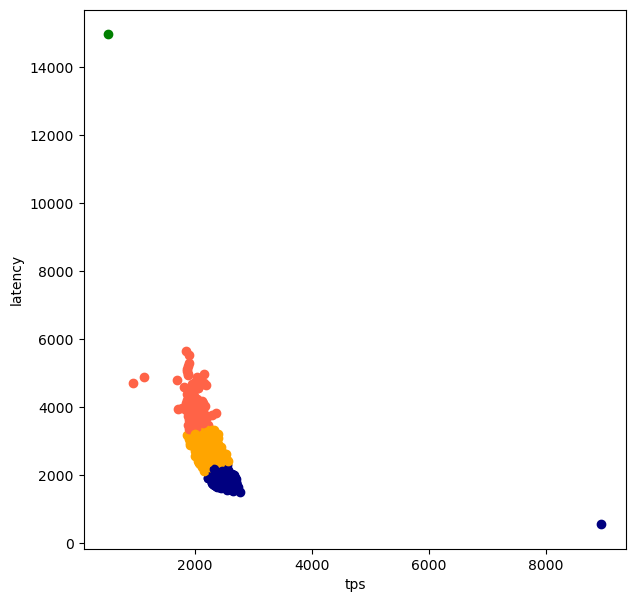

0 : 1671
1 :   99
2 :    1
3 :  229
===================9 workload===================


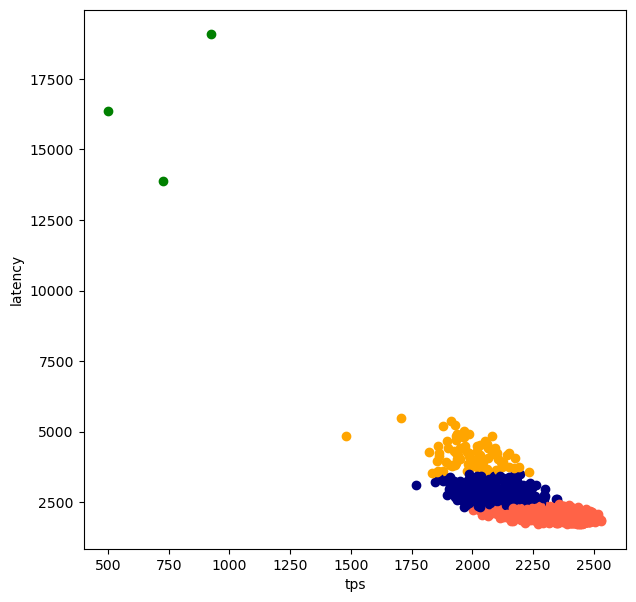

0 :  243
1 : 1671
2 :    3
3 :   83


In [3]:
for wk in range(10):
    print(f'==================={wk} workload===================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    labels = KmeanClustering(external, 4)
    cls, cnt = np.unique(labels, return_counts=True)
    print(f'{cls[0]} : {cnt[0]:4}\n{cls[1]} : {cnt[1]:4}\n{cls[2]} : {cnt[2]:4}\n{cls[3]} : {cnt[3]:4}')
    #print(f'score = {davies_bouldin_score(raw_knobs, labels)}')
    print(f'==================================================')

===================0 workload===================


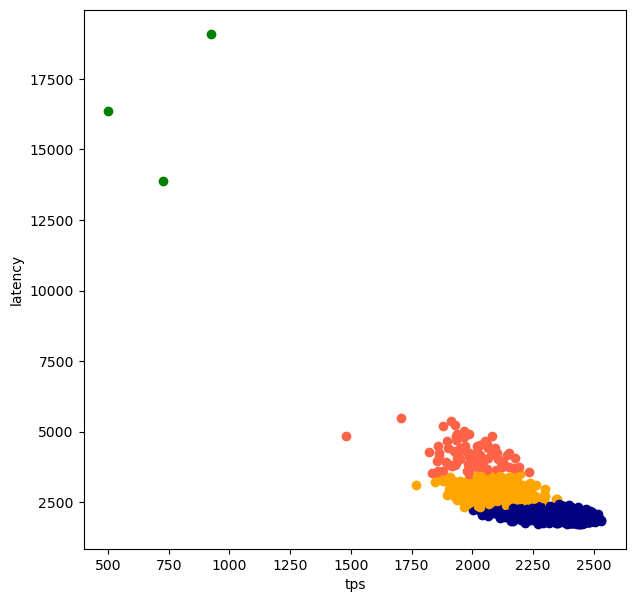

0 : 1669
1 :   84
2 :    3
3 :  244
score = 108.8221398140181
===================1 workload===================


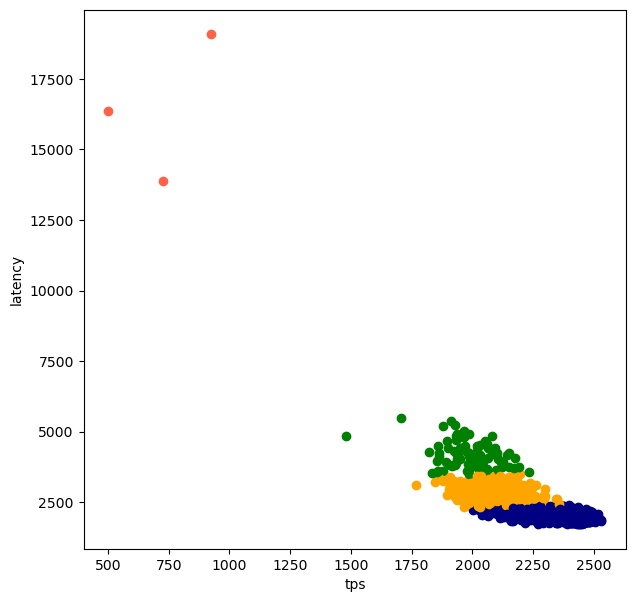

0 : 1668
1 :    3
2 :   84
3 :  245
score = 79.24456996545862
===================2 workload===================


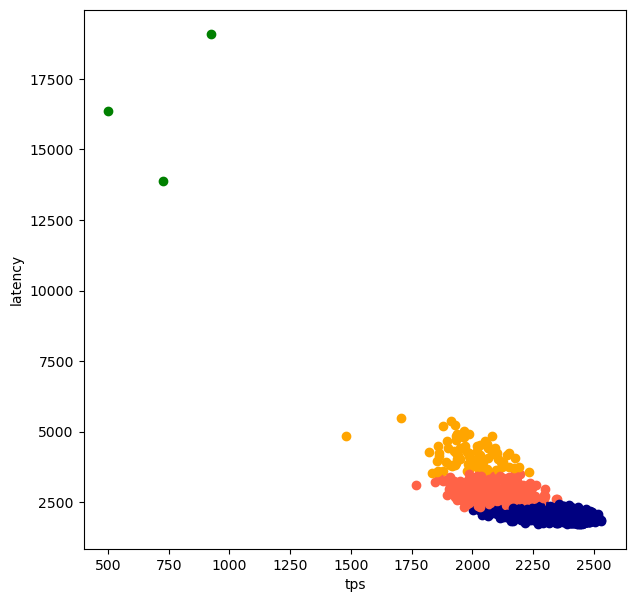

0 : 1671
1 :  243
2 :    3
3 :   83
score = 61.044168348071466
===================3 workload===================


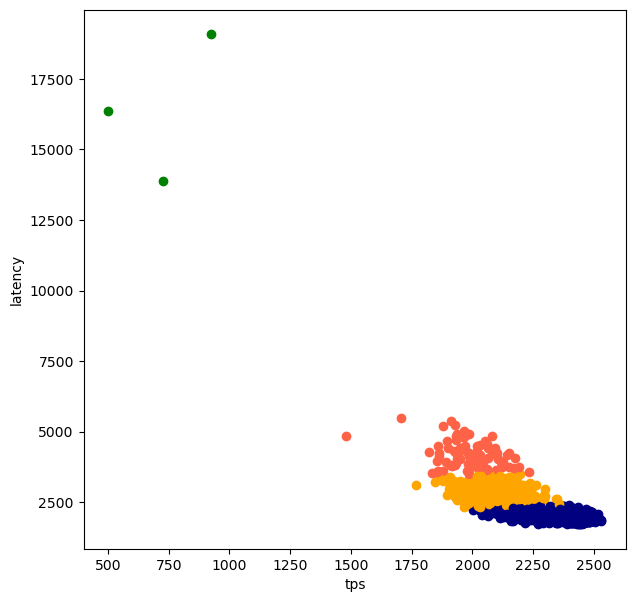

0 : 1668
1 :   84
2 :    3
3 :  245
score = 79.24456996545862
===================4 workload===================


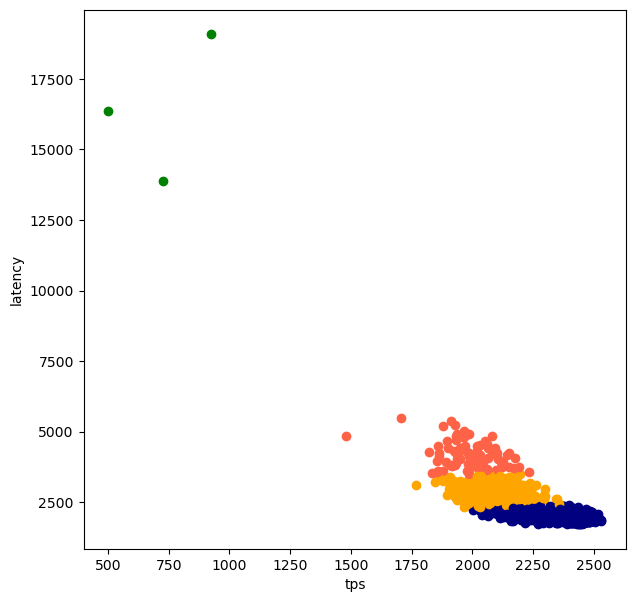

0 : 1668
1 :   84
2 :    3
3 :  245
score = 79.24456996545862
===================5 workload===================


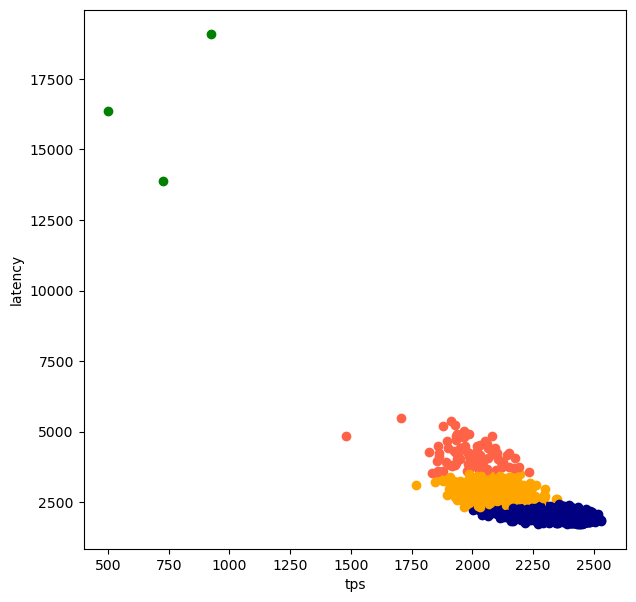

0 : 1671
1 :   83
2 :    3
3 :  243
score = 61.044168348071466
===================6 workload===================


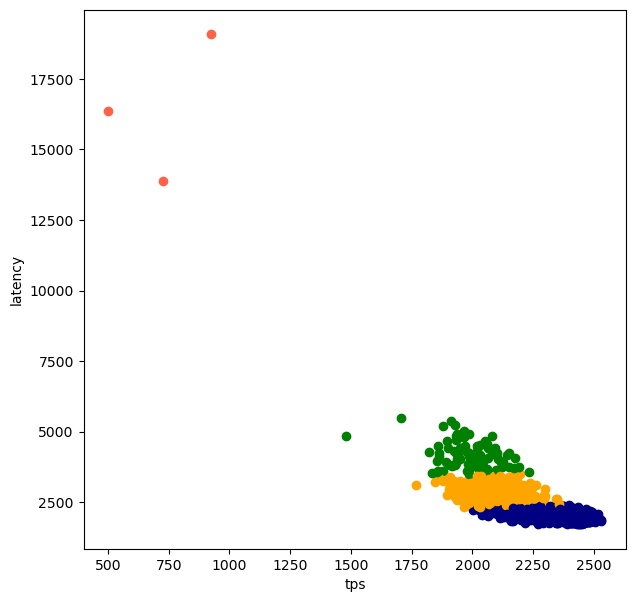

0 : 1668
1 :    3
2 :   84
3 :  245
score = 79.24456996545862
===================7 workload===================


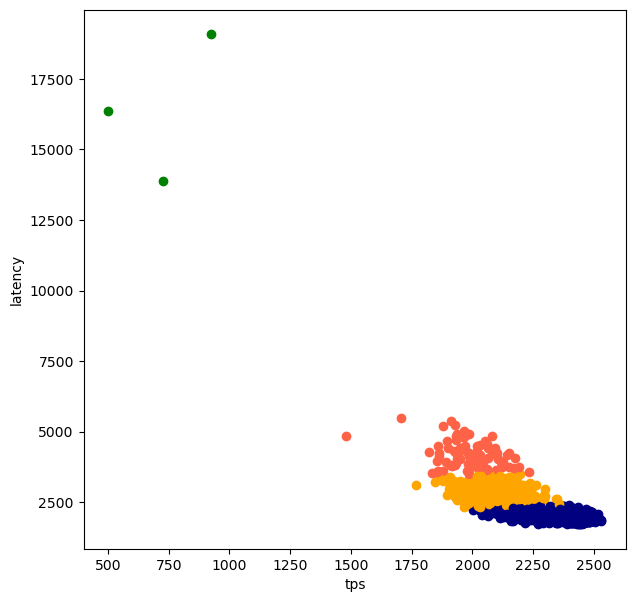

0 : 1668
1 :   84
2 :    3
3 :  245
score = 79.24456996545862
===================8 workload===================


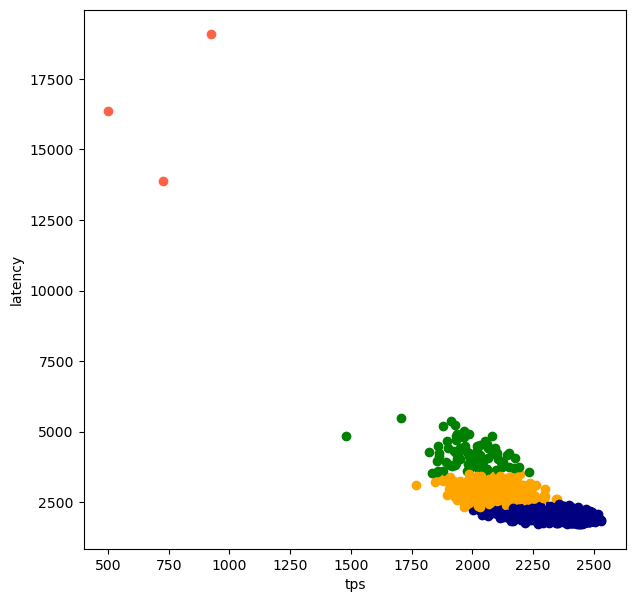

0 : 1671
1 :    3
2 :   83
3 :  243
score = 61.044168348071466
===================9 workload===================


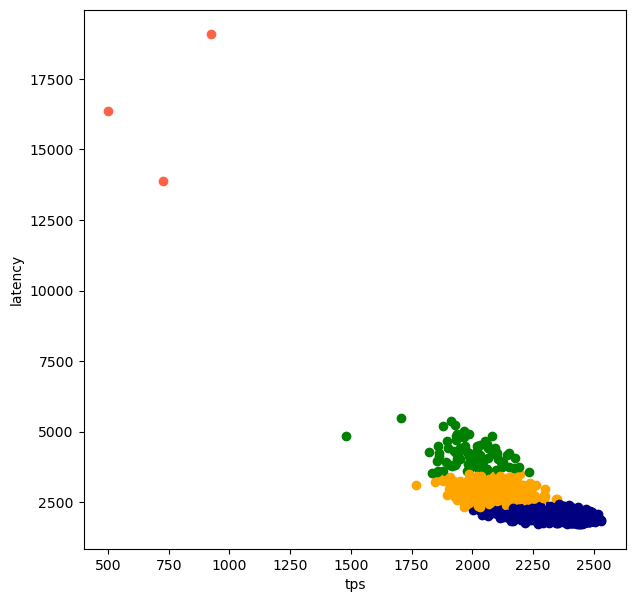

0 : 1671
1 :    3
2 :   83
3 :  243
score = 61.044168348071466


In [120]:
for i in range(10):
    print(f'==================={i} workload===================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    labels = KmeanClustering(external, 4)
    cls, cnt = np.unique(labels, return_counts=True)
    print(f'{cls[0]} : {cnt[0]:4}\n{cls[1]} : {cnt[1]:4}\n{cls[2]} : {cnt[2]:4}\n{cls[3]} : {cnt[3]:4}')
    print(f'score = {davies_bouldin_score(raw_knobs, labels)}')
    print(f'==================================================')

LightGBM Classifier

In [4]:
def get_class_num(data):
    cls, cnt = np.unique(data, return_counts=True)
    print(f'# of the largest class / # of data = {max(cnt) / sum(cnt)}')
    for _ in range(len(cls)):
        print(f'{cls[_]} : {cnt[_]}')

In [5]:
# from lightgbm import LGBMClassifier as lgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    clf = lgb.LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False)
    # clf = lgb.LGBMClassifier(n_estimators=1000,num_iterations = 200, learning_rate = 0.0001, 
    #                          num_leaves=128, max_depth=20, n_jobs=-1, boost_from_average=False)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('f1 score ', f1_score(y_test, pred, average='weighted'))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.642
0 : 611
1 : 12
2 : 1284
3 : 93
********true********
# of the largest class / # of data = 0.6525
0 : 238
1 : 3
2 : 522
3 : 37
********pred********
# of the largest class / # of data = 0.705
0 : 206
1 : 1
2 : 564
3 : 29
f1 score :  0.8893090896647527
precision :  0.8928859098647329
recall :  0.8925
accuracy:  0.8925
balanced accuracy:  0.7040278832875182
=WK1===============================================================
# of the largest class / # of data = 0.524
0 : 822
1 : 122
2 : 8
3 : 1048
********true********
# of the largest class / # of data = 0.50625
0 : 350
1 : 42
2 : 3
3 : 405
********pred********
# of the largest class / # of data = 0.5575
0 : 310
1 : 40
2 : 4
3 : 446
f1 score :  0.7748152545819564
precision :  0.7777430203963547
recall :  0.77625
accuracy:  0.77625
balanced accuracy:  0.6762522045855379
=WK2============================================================

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.8075
0 : 1615
1 : 127
2 : 256
3 : 2
********true********
# of the largest class / # of data = 0.79625
0 : 637
1 : 60
2 : 102
3 : 1
********pred********
# of the largest class / # of data = 0.81125
0 : 649
1 : 54
2 : 97
f1 score :  0.9612503624778553
precision :  0.9606563715081977
recall :  0.9625
accuracy:  0.9625
balanced accuracy:  0.675488657001262
=WK4===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.408
0 : 816
1 : 326
2 : 702
3 : 156
********true********
# of the largest class / # of data = 0.425
0 : 340
1 : 132
2 : 277
3 : 51
********pred********
# of the largest class / # of data = 0.41875
0 : 335
1 : 117
2 : 297
3 : 51
f1 score :  0.8312536261966177
precision :  0.8328688917494886
recall :  0.83125
accuracy:  0.83125
balanced accuracy:  0.827344559418779
=WK5===============================================================
# of the largest class / # of data = 0.4685
0 : 299
1 : 157
2 : 937
3 : 607
********true********
# of the largest class / # of data = 0.475
0 : 109
1 : 64
2 : 380
3 : 247
********pred********
# of the largest class / # of data = 0.50875
0 : 104
1 : 56
2 : 407
3 : 233
f1 score :  0.816293653638796
precision :  0.8172007038497113
recall :  0.8175
accuracy:  0.8175
balanced accuracy:  0.8067013450395573
=WK6===============================================================
# of the largest class / # of data = 0.623
0 : 446
1 : 

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
#boost_from_average = True

# from lightgbm import LGBMClassifier as lgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    #clf = lgb.LGBMClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    clf = lgb.LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=True)
    # clf = lgb.LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('f1 score ', f1_score(y_test, pred, average='weighted'))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.6495
0 : 1299
1 : 93
2 : 12
3 : 596
********true********
# of the largest class / # of data = 0.66125
0 : 529
1 : 33
2 : 4
3 : 234
********pred********
# of the largest class / # of data = 0.69125
0 : 553
1 : 26
2 : 2
3 : 219
accuracy:  0.86875
f1 score  0.8659618362069498
balanced accuracy:  0.6516053915628585
=WK1===============================================================
# of the largest class / # of data = 0.5265
0 : 1053
1 : 122
2 : 8
3 : 817
********true********
# of the largest class / # of data = 0.535
0 : 428
1 : 52
2 : 3
3 : 317
********pred********
# of the largest class / # of data = 0.565
0 : 452
1 : 45
3 : 303
accuracy:  0.765
f1 score  0.7624446972216344
balanced accuracy:  0.5625605231467727
=WK2===============================================================
# of the largest class / # of data = 0.8355
0 : 1671
1 : 104
2 : 223
3 : 2
********true********
# of the

In [9]:
# from lightgbm import LGBMClassifier as lgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    clf = lgb.LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False)
    # clf = lgb.LGBMClassifier(n_estimators=1000,num_iterations = 200, learning_rate = 0.0001, 
    #                          num_leaves=128, max_depth=20, n_jobs=-1, boost_from_average=False)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('f1 score ', f1_score(y_test, pred, average='weighted'))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.844
0 : 1688
1 : 16
2 : 296
********true********
# of the largest class / # of data = 0.8525
0 : 682
1 : 6
2 : 112
********pred********
# of the largest class / # of data = 0.86375
0 : 691
2 : 109
f1 score :  0.9310350225585221
precision :  0.9271808574197746
recall :  0.935
accuracy:  0.935
balanced accuracy:  0.5795105432202207
=WK1===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.925
0 : 1850
1 : 142
2 : 8
********true********
# of the largest class / # of data = 0.9325
0 : 746
1 : 50
2 : 4
********pred********
# of the largest class / # of data = 0.93375
0 : 747
1 : 53
f1 score :  0.983917602533506
precision :  0.9816828951024223
recall :  0.98625
accuracy:  0.98625
balanced accuracy:  0.6448793565683646
=WK2===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.8855
0 : 1771
1 : 227
2 : 2
********true********
# of the largest class / # of data = 0.89
0 : 712
1 : 87
2 : 1
********pred********
# of the largest class / # of data = 0.89
0 : 712
1 : 88
f1 score :  0.9682142857142857
precision :  0.9676846590909091
recall :  0.96875
accuracy:  0.96875
balanced accuracy:  0.6150716776443238
=WK3===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.817
0 : 251
1 : 115
2 : 1634
********true********
# of the largest class / # of data = 0.80125
0 : 110
1 : 49
2 : 641
********pred********
# of the largest class / # of data = 0.81125
0 : 111
1 : 40
2 : 649
f1 score :  0.9420715726080587
precision :  0.9428167420598565
recall :  0.9425
accuracy:  0.9425
balanced accuracy:  0.8580258312373311
=WK4===============================================================
# of the largest class / # of data = 0.599
0 : 1198
1 : 536
2 : 266
********true********
# of the largest class / # of data = 0.58
0 : 464
1 : 212
2 : 124
********pred********
# of the largest class / # of data = 0.6
0 : 480
1 : 205
2 : 115
f1 score :  0.8765152202753788
precision :  0.8763375309296572
recall :  0.8775
accuracy:  0.8775
balanced accuracy:  0.8466513281703639
=WK5===============================================================
# of the largest class / # of data = 0.675
0 : 1350
1 : 201
2 : 449
********true********
# of the large

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# from lightgbm import LGBMClassifier as lgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    clf = lgb.LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=True)
    # clf = lgb.LGBMClassifier(n_estimators=1000,num_iterations = 200, learning_rate = 0.0001, 
    #                          num_leaves=128, max_depth=20, n_jobs=-1, boost_from_average=False)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('f1 score ', f1_score(y_test, pred, average='weighted'))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.844
0 : 1688
1 : 296
2 : 16
********true********
# of the largest class / # of data = 0.845
0 : 676
1 : 119
2 : 5
********pred********
# of the largest class / # of data = 0.87375
0 : 699
1 : 96
2 : 5
f1 score :  0.9425745454545456
precision :  0.9433625044706724
recall :  0.945
accuracy:  0.945
balanced accuracy:  0.8359653920739895
=WK1===============================================================
# of the largest class / # of data = 0.925
0 : 1850
1 : 142
2 : 8
********true********
# of the largest class / # of data = 0.9225
0 : 738
1 : 58
2 : 4
********pred********
# of the largest class / # of data = 0.93125
0 : 745
1 : 53
2 : 2
f1 score :  0.9758719542198976
precision :  0.974539571989363
recall :  0.9775
accuracy:  0.9775
balanced accuracy:  0.6073887175653366
=WK2===============================================================
# of the largest class / # of data = 0.8855
0 

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# from lightgbm import LGBMClassifier as lgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    clf = lgb.LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False)
    # clf = lgb.LGBMClassifier(n_estimators=1000,num_iterations = 200, learning_rate = 0.0001, 
    #                          num_leaves=128, max_depth=20, n_jobs=-1, boost_from_average=False)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('f1 score ', f1_score(y_test, pred, average='weighted'))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

In [7]:
#### parmeter tuning ###

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import lightgbm as lgb
from sklearn.model_selection import KFold

clf = lgb.LGBMClassifier()

lgb_param_grid = {
    # "n_estimators" : [100, 200, 300, 400, 500],
    # "learning_rate" : [0.001, 0.005, 0.0001, 0.0005],
    # "max_depth" : [4, 6, 8, 10, 12]
    "n_estimators" : [1000, 1500, 2000],
    "learning_rate" : [0.001, 0.005],
    "max_depth" : [6,7,8,9,10,11,12],
    "num_leaves" : [31,32,33,37,40]
}

# cv=KFold(n_splits=6, random_state = 1)

lgb_grid = GridSearchCV(estimator = clf, param_grid = lgb_param_grid, scoring = "accuracy"
                        , cv=3) #n_jobs = -1, verbose = 1)

# clf_grid.fit(scaled_X_train, y_train)
lgb_grid.fit(scaled_X_train, y_train)
# print('XGB 예측 정확도: {:.4f}'.format(xgb_grid.best_score_))
print(lgb_grid.best_params_)


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'learning_rate': 0.005, 'max_depth': 9, 'n_estimators': 1500, 'num_leaves': 32}


In [13]:
## LGBM with GridSearch Parameter Tuning

import lightgbm as lgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    clf = lgb.LGBMClassifier(learning_rate = 0.005, max_depth = 9, n_estimators = 1500,
                             num_leaves = 32, boost_from_average=False )
    # clf = lgb.LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False)
    # clf = lgb.LGBMClassifier(n_estimators=1000,num_iterations = 200, learning_rate = 0.0001, 
    #                          num_leaves=128, max_depth=20, n_jobs=-1, boost_from_average=False)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('f1 score ', f1_score(y_test, pred, average='weighted'))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.844
0 : 1688
1 : 16
2 : 296
********true********
# of the largest class / # of data = 0.85375
0 : 683
1 : 5
2 : 112
********pred********
# of the largest class / # of data = 0.86
0 : 688
1 : 4
2 : 108
f1 score :  0.9381033419534512
precision :  0.9376551733419467
recall :  0.93875
accuracy:  0.93875
balanced accuracy:  0.7790368123823468
=WK1===============================================================
# of the largest class / # of data = 0.925
0 : 1850
1 : 142
2 : 8
********true********
# of the largest class / # of data = 0.92625
0 : 741
1 : 55
2 : 4
********pred********
# of the largest class / # of data = 0.93625
0 : 749
1 : 49
2 : 2
f1 score :  0.9821729801239029
precision :  0.9810640377646385
recall :  0.98375
accuracy:  0.98375
balanced accuracy:  0.6177319756267124
=WK2===============================================================
# of the largest class / # of data = 0

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.8935
0 : 210
1 : 1787
2 : 3
********true********
# of the largest class / # of data = 0.89375
0 : 82
1 : 715
2 : 3
********pred********
# of the largest class / # of data = 0.9125
0 : 70
1 : 730
f1 score :  0.9581945456201055
precision :  0.9563764677103717
recall :  0.96125
accuracy:  0.96125
balanced accuracy:  0.5816362499289328


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
